Author: Monika Dörig, monika.doerig@balgrist.ch

__Integrative Spinal Research, Department of Chiropractic Medicine, Balgrist University Hospital, University of Zurich, Zurich, Switzerland__

__Lucerne University of Applied Sciences and Arts, Horw__

# Create Model Representational Dissimilarity Matrices 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from nilearn import plotting
import rsatoolbox as rsa
from rsatoolbox.model import ModelFixed
from rsatoolbox.rdm import RDMs

In [2]:
def upper_tri(RDM):
    """upper_tri returns the upper triangular index of an RDM
    
    Args:
        RDM 2Darray: squareform RDM
    
    Returns:
        1D array: upper triangular vector of the RDM
    """
    # returns the upper triangle
    m = RDM.shape[0]
    r, c = np.triu_indices(m, 1)
    return RDM[r, c]

In [3]:
import matplotlib.colors
def RDMcolormapObject(direction=1):
    """
    Returns a matplotlib color map object for RSA and brain plotting
    """
    if direction == 0:
        cs = ['yellow', 'red', 'gray', 'turquoise', 'blue']
    elif direction == 1:
        cs = ['blue', 'turquoise', 'gray', 'red', 'yellow']
    else:
        raise ValueError('Direction needs to be 0 or 1')
    cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", cs)
    return cmap

### Simple Model

In [4]:
d = {'T3': [0,0,0,0,0,1,1,1,1], 'T5': [0,0,0,0,0,1,1,1,1], 'T7': [0,0,0,0,0,1,1,1,1], 'T9': [0,0,0,0,0,1,1,1,1],
     'T11': [0,0,0,0,0,1,1,1,1], 'L1': [1,1,1,1,1,0,0,0,0], 'L3': [1,1,1,1,1,0,0,0,0] , 'L5': [1,1,1,1,1,0,0,0,0],
     'S1': [1,1,1,1,1,0,0,0,0]
    }

df = pd.DataFrame(data=d, index = ['T3', 'T5', 'T7', 'T9', 'T11', 'L1', 'L3', 'L5', 'S1'])
df.head(9)

,T3,T5,T7,T9,T11,L1,L3,L5,S1
T3,0,0,0,0,0,1,1,1,1
T5,0,0,0,0,0,1,1,1,1
T7,0,0,0,0,0,1,1,1,1
T9,0,0,0,0,0,1,1,1,1
T11,0,0,0,0,0,1,1,1,1
L1,1,1,1,1,1,0,0,0,0
L3,1,1,1,1,1,0,0,0,0
L5,1,1,1,1,1,0,0,0,0
S1,1,1,1,1,1,0,0,0,0


In [5]:
df_simple_np = df.to_numpy()
np.save('simple_model.npy', df_simple_np)

In [6]:
simple_model = np.load('simple_model.npy')
print(simple_model.shape)
simple_modelRDM = ModelFixed('Simple RDM', upper_tri(simple_model))

(9, 9)


In [7]:
pred = simple_modelRDM.predict() # returns a numpy vectorized format
pred_rdm = simple_modelRDM.predict_rdm() # returns a RDMs object
des_segments = {'Segment': (['T3', 'T5', 'T7', 'T9', 'T11', 'L1', 'L3', 'L5', 'S1'])}
pred_rdm.pattern_descriptors = des_segments
print(pred_rdm.pattern_descriptors)

{'Segment': ['T3', 'T5', 'T7', 'T9', 'T11', 'L1', 'L3', 'L5', 'S1']}


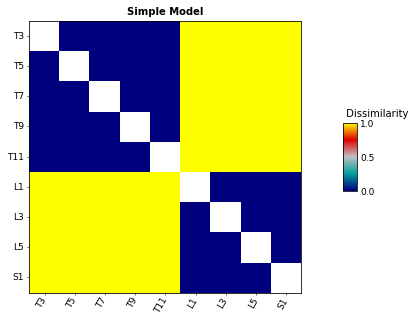

In [8]:
#show rdm
pred_rdm.dissimilarity_measure = " Dissimilarity"
rsa.vis.show_rdm(pred_rdm, show_colorbar='panel', rdm_descriptor='Simple Model', pattern_descriptor='Segment', figsize=(15,5))
plt.show();
None

### Segmental Model

In [9]:
d_l = {'T3': [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.75], 'T5': [0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.65], 'T7': [0.2,0.1,0.0,0.1,0.2,0.3,0.4,0.5,0.55], 'T9': [0.3,0.2,0.1,0.0,0.1,0.2,0.3,0.4,0.45],
     'T11': [0.4,0.3,0.2,0.1,0.0,0.1,0.2,0.3,0.35], 'L1': [0.5,0.4,0.3,0.2,0.1,0.0,0.1,0.2,0.25], 'L3': [0.6,0.5,0.4,0.3,0.2,0.1,0.0,0.1,0.15] , 'L5': [0.7,0.6,0.5,0.4,0.3,0.2,0.1,0.0,0.05],
     'S1': [0.75,0.65,0.55,0.45,0.35,0.25,0.15,0.05,0.0]
    }

df_l = pd.DataFrame(data=d_l, index = ['T3', 'T5', 'T7', 'T9', 'T11', 'L1', 'L3', 'L5', 'S1'])
df_l.head(9)

,T3,T5,T7,T9,T11,L1,L3,L5,S1
T3,0.00,0.10,0.20,0.30,0.40,0.50,0.60,0.70,0.75
T5,0.10,0.00,0.10,0.20,0.30,0.40,0.50,0.60,0.65
T7,0.20,0.10,0.00,0.10,0.20,0.30,0.40,0.50,0.55
T9,0.30,0.20,0.10,0.00,0.10,0.20,0.30,0.40,0.45
T11,0.40,0.30,0.20,0.10,0.00,0.10,0.20,0.30,0.35
L1,0.50,0.40,0.30,0.20,0.10,0.00,0.10,0.20,0.25
L3,0.60,0.50,0.40,0.30,0.20,0.10,0.00,0.10,0.15
L5,0.70,0.60,0.50,0.40,0.30,0.20,0.10,0.00,0.05
S1,0.75,0.65,0.55,0.45,0.35,0.25,0.15,0.05,0.00


In [10]:
df_segmental_np = df_l.to_numpy()
np.save('linear_model.npy', df_segmental_np)
linear_model = np.load('linear_model.npy')
print(linear_model.shape)
linear_modelRDM = ModelFixed('Linear RDM', upper_tri(linear_model))

(9, 9)


In [11]:
pred_linear = linear_modelRDM.predict() # returns a numpy vectorized format
pred_rdm_linear = linear_modelRDM.predict_rdm() # returns a RDMs object

pred_rdm_linear.pattern_descriptors = des_segments
print(pred_rdm_linear.pattern_descriptors)

{'Segment': ['T3', 'T5', 'T7', 'T9', 'T11', 'L1', 'L3', 'L5', 'S1'], 'index': [0, 1, 2, 3, 4, 5, 6, 7, 8]}


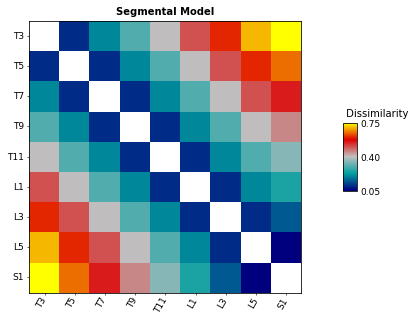

In [12]:
pred_rdm_linear.dissimilarity_measure = " Dissimilarity"
rsa.vis.show_rdm(pred_rdm_linear, show_colorbar ='panel', rdm_descriptor='Segmental Model', pattern_descriptor='Segment', figsize=(15,5))
plt.show();
None

### Random Model

In [13]:
d_random = {'T3': [0.0,0.0,0.9,0.1,0.1,0.9,0.4,0.2,0.9], 'T5': [0.0,0.0,0.5,0.0,0.2,0.1,0.9,0.1,0.5], 'T7': [0.9,0.5,0.0,0.4,0.3,0.5,0.1,0.9,0.4], 'T9': [0.1,0.0,0.4,0.0,0.4,0.7,0.6,0.4,0.6],
     'T11': [0.1,0.2,0.3,0.4,0.0,0.0,0.5,0.5,0.1], 'L1': [0.9,0.1,0.5,0.7,0.0,0.0,0.7,0.0,0.2], 'L3': [0.4,0.9,0.1,0.6,0.5,0.7,0.0,0.7,0.7] , 'L5': [0.2,0.1,0.9,0.4,0.5,0.0,0.7,0.0,0.0],
     'S1': [0.9,0.5,0.4,0.6,0.1,0.2,0.7,0.0,0.0]
    }

df_random = pd.DataFrame(data=d_random, index = ['T3', 'T5', 'T7', 'T9', 'T11', 'L1', 'L3', 'L5', 'S1'])
df_random.head(9)

,T3,T5,T7,T9,T11,L1,L3,L5,S1
T3,0.0,0.0,0.9,0.1,0.1,0.9,0.4,0.2,0.9
T5,0.0,0.0,0.5,0.0,0.2,0.1,0.9,0.1,0.5
T7,0.9,0.5,0.0,0.4,0.3,0.5,0.1,0.9,0.4
T9,0.1,0.0,0.4,0.0,0.4,0.7,0.6,0.4,0.6
T11,0.1,0.2,0.3,0.4,0.0,0.0,0.5,0.5,0.1
L1,0.9,0.1,0.5,0.7,0.0,0.0,0.7,0.0,0.2
L3,0.4,0.9,0.1,0.6,0.5,0.7,0.0,0.7,0.7
L5,0.2,0.1,0.9,0.4,0.5,0.0,0.7,0.0,0.0
S1,0.9,0.5,0.4,0.6,0.1,0.2,0.7,0.0,0.0


In [14]:
df_random_np = df_random.to_numpy()
np.save('random_model.npy', df_random_np)
random_model = np.load('random_model.npy')
random_model_RDM = ModelFixed('Random RDM', upper_tri(random_model))

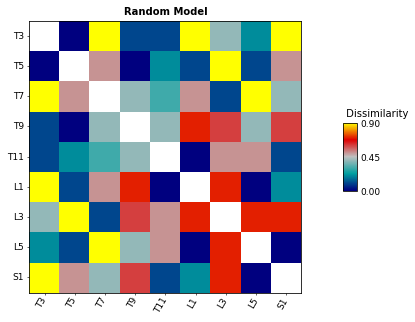

In [15]:
pred_random = random_model_RDM.predict() # returns a numpy vectorized format
pred_random_rdm = random_model_RDM.predict_rdm() # returns a RDMs object

pred_random_rdm.pattern_descriptors = des_segments

pred_random_rdm.dissimilarity_measure = " Dissimilarity"
rsa.vis.show_rdm(pred_random_rdm, show_colorbar='panel', rdm_descriptor='Random Model', pattern_descriptor='Segment', figsize=(15,5))
plt.show();
None